In [66]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Dropout, Flatten, GaussianNoise
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import utils
from imutils import paths
import tensorflow as tf
import numpy as np
import argparse
import cv2
import os
import random
import matplotlib.pyplot as plt
import random

# Fashion MNist

Similar to the MNIST digit dataset, the Fashion MNIST dataset includes:

- 60,000 training examples
- 10,000 testing examples
- 10 classes
- 28×28 grayscale/single channel images

The ten fashion class labels include:

- T-shirt/top
- Trouser/pants
- Pullover shirt
- Dress
- Coat
- Sandal
- Shirt
- Sneaker
- Bag
- Ankle boot

In [67]:
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(labels)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [68]:
from tensorflow.keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

# Visualizing the data

Let's view some pictures of the dataset to get a better understanding of the data.

T-shirt/top


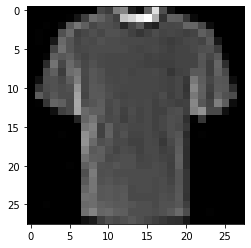

Trouser


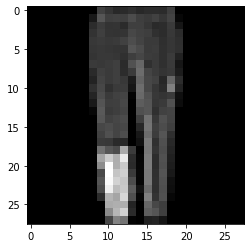

Pullover


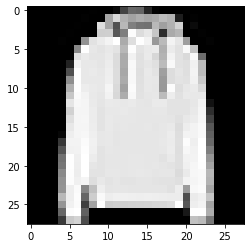

Dress


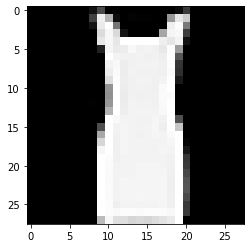

Coat


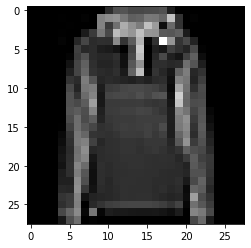

Sandal


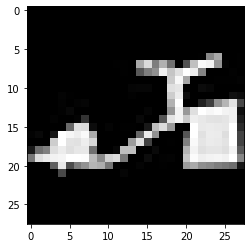

Shirt


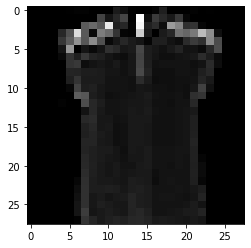

Sneaker


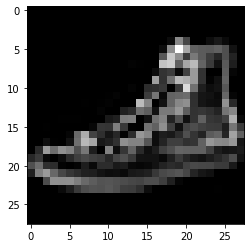

Bag


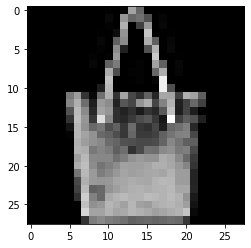

Ankle boot


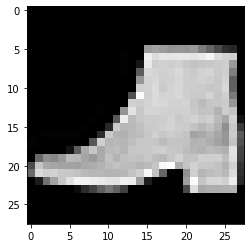

In [69]:
# showing one random item of each category
for i in range(0, 10):
    # getting index of category
    x = np.where(trainY == i)
    l = x[0].shape
    l = l[0]
    # get one randome index of the category
    z = random.randint(0, l)
    y = x[0][z]
    print(labels[i])
    # showing the randome example of the category
    plt.imshow(trainX[y], cmap="gray")
    plt.show()

We can see how clean the images are taken. The background is pure black and the items are filling out the whole frame.
Also the pictures show the perfect Silhouette of the items and are not shot with different angles.

# Data preperation

To generate more training- and testdata, I mirror the pictures on the vertical axis. So I get twice as much data without much effort.

In [70]:
print(f"Trainingsset size original: {trainX.shape}")
print(f"Testset size original: {testX.shape}")

fliped_images = trainX[:,:,::-1]
trainX = np.append(trainX, fliped_images, axis=0)
trainY = np.append(trainY, trainY)

fliped_images = testX[:,:,::-1]
testX = np.append(testX, fliped_images, axis=0)
testY = np.append(testY, testY)

print(f"Trainingsset size after: {trainX.shape}")
print(f"Testset size after: {testX.shape}")

Trainingsset size original: (60000, 28, 28)
Testset size original: (10000, 28, 28)
Trainingsset size after: (120000, 28, 28)
Testset size after: (20000, 28, 28)


To train a neuronal network with these picures we have to reshape the data a little bit.

In [71]:
train_X = trainX.reshape(120000, 784)
test_X = testX.reshape(20000, 784)
print(trainX.shape)
print(testX.shape)

(120000, 28, 28)
(20000, 28, 28)


To train the neuronal network with a softmax activationfuction on the output neurons we change the results to a one-hot-encoding

In [72]:
print(f"original class: {trainY[0]}")
train_Y = utils.to_categorical(trainY)
test_Y = utils.to_categorical(testY)
print(f"one-hot-encoded class: {train_Y[0]}")

original class: 9
one-hot-encoded class: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Training the neuronal networks

At first we just build a simple feat forward network. Just to see how well it handles the the data.

For that I couse a network architecture with seven fully connected layers. One inputlayer with 784 inputdimensions for the 784 pixels in our 28x28 pictures and a outputlayer with ten neurons each for one category.

To train neuronal networks more quickly it is highly recommended to work with a GPU.

These GPUs usually are for calculating graphics in Videogames. But working with graphics is just like machine learning working  with a bunch of matrix multiplications.
These cips are designed to calculate those kinds of matrix operations very efficient.

For this to work with my "old" Nvidia GTX770, I had to recompile the tensorflow library.

In [73]:
model = Sequential()
model.add(Dense(500, input_dim=784, activation="relu"))
model.add(Dense(300, activation="relu", kernel_initializer="uniform"))
model.add(Dense(200, activation="relu", kernel_initializer="uniform"))
model.add(Dense(100, activation="relu", kernel_initializer="uniform"))
model.add(Dense(50, activation="relu", kernel_initializer="uniform"))
model.add(Dense(25, activation="relu", kernel_initializer="uniform"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer='RMSprop', metrics=["accuracy"])

In [75]:
history = model.fit(train_X, train_Y, validation_split=0.20, epochs=20, batch_size=2400, verbose=1)

Train on 96000 samples, validate on 24000 samples
Epoch 1/20
96000/96000 [==============================] - 1s 13us/sample - loss: 1.6887 - accuracy: 0.3679 - val_loss: 1.4761 - val_accuracy: 0.4885
Epoch 2/20
96000/96000 [==============================] - 1s 5us/sample - loss: 0.9215 - accuracy: 0.6504 - val_loss: 0.8673 - val_accuracy: 0.6515
Epoch 3/20
96000/96000 [==============================] - 1s 6us/sample - loss: 0.6935 - accuracy: 0.7389 - val_loss: 0.5724 - val_accuracy: 0.7795
Epoch 4/20
96000/96000 [==============================] - 1s 5us/sample - loss: 0.5914 - accuracy: 0.7806 - val_loss: 0.7372 - val_accuracy: 0.7233
Epoch 5/20
96000/96000 [==============================] - 1s 5us/sample - loss: 0.5283 - accuracy: 0.8011 - val_loss: 0.5512 - val_accuracy: 0.7997
Epoch 6/20
96000/96000 [==============================] - 1s 5us/sample - loss: 0.4861 - accuracy: 0.8203 - val_loss: 0.6505 - val_accuracy: 0.7874
Epoch 7/20
96000/96000 [==============================] - 1s 

In [87]:
#model.save("models/simple_model")

INFO:tensorflow:Assets written to: models/simple_model/assets


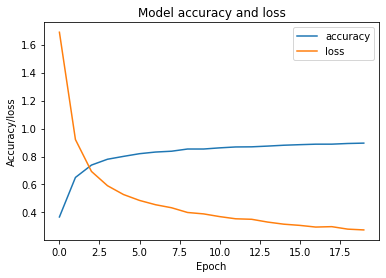

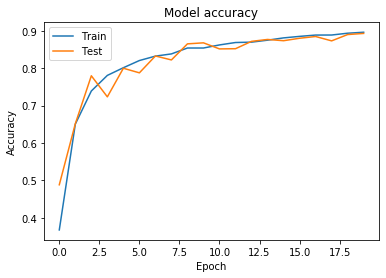

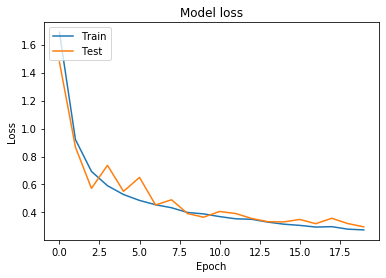

loss: 0.3416, accuracy: 87.87%


In [76]:
model = tf.keras.models.load_model("models/adv_model")

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy and loss')
plt.ylabel('Accuracy/loss')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

(loss, accuracy) = model.evaluate(test_X, test_Y, verbose=0)
print(f"loss: {loss:.4f}, accuracy: {accuracy * 100:.2f}%")

After 20 epochs we have an accuracy of 86.81% on the testset. let's se what we can do with the data or the architecture of the neuronal network to get better results.

# Normalize inputs

At first we normalize our inputs with the mean-standarddeviation normalization.

In [77]:
train_means = train_X.mean(axis=0)
train_stds =train_X.std(axis=0)

train_X = train_X - train_means
train_X = train_X / train_stds

test_X = test_X - train_means
test_X = test_X / train_stds

In [78]:
train_X = train_X / 255
test_X = test_X / 255

# Advanced network architecture

For image classification it is usually a good idea to work with convolutions.

Let's introduce a dropout rate for the different layers.

For the Convolutions to work we have to reshape the data so that we have the 28x28 pictures again.

In [79]:
train_X = train_X.reshape((-1, 28, 28, 1))
test_X = test_X.reshape((-1, 28, 28, 1))

In [80]:
adv_model = Sequential()

adv_model.add(Conv2D(64, (3, 3), padding='same', input_shape = (28, 28, 1), activation = 'relu'))
adv_model.add(MaxPooling2D(pool_size = (2, 2)))
adv_model.add(Dropout(0.25))

adv_model.add(Conv2D(128, (3, 3), padding='same', activation = 'relu'))
adv_model.add(MaxPooling2D(pool_size = (2, 2)))
adv_model.add(Dropout(0.25))

adv_model.add(Conv2D(256, (3, 3), padding='same', activation = 'relu'))
adv_model.add(MaxPooling2D(pool_size = (2, 2)))
adv_model.add(Dropout(0.25))
adv_model.add(Flatten())

adv_model.add(Dense(500, activation="relu"))
adv_model.add(Dropout(0.30))
adv_model.add(Dense(300, activation="relu"))
adv_model.add(Dropout(0.25))
adv_model.add(Dense(200, activation="relu"))
adv_model.add(Dropout(0.20))
adv_model.add(Dense(100, activation="relu"))
adv_model.add(Dropout(0.15))
adv_model.add(Dense(50, activation="relu"))
adv_model.add(Dropout(0.10))
adv_model.add(Dense(25, activation="relu"))
adv_model.add(Dropout(0.05))
adv_model.add(Dense(10, activation="softmax"))

adv_model.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])

In [82]:
history = adv_model.fit(train_X, train_Y, validation_split=0.20, epochs=40, batch_size=2400, verbose=1)

Train on 96000 samples, validate on 24000 samples
Epoch 1/40
96000/96000 [==============================] - 17s 181us/sample - loss: 2.0990 - accuracy: 0.1901 - val_loss: 1.4947 - val_accuracy: 0.4141
Epoch 2/40
96000/96000 [==============================] - 17s 173us/sample - loss: 1.2503 - accuracy: 0.5091 - val_loss: 0.8244 - val_accuracy: 0.7097
Epoch 3/40
96000/96000 [==============================] - 17s 173us/sample - loss: 0.8708 - accuracy: 0.6760 - val_loss: 0.6708 - val_accuracy: 0.7488
Epoch 4/40
96000/96000 [==============================] - 17s 174us/sample - loss: 0.7291 - accuracy: 0.7309 - val_loss: 0.5841 - val_accuracy: 0.7840
Epoch 5/40
96000/96000 [==============================] - 17s 174us/sample - loss: 0.6455 - accuracy: 0.7617 - val_loss: 0.5325 - val_accuracy: 0.8025
Epoch 6/40
96000/96000 [==============================] - 17s 175us/sample - loss: 0.5915 - accuracy: 0.7818 - val_loss: 0.5095 - val_accuracy: 0.8088
Epoch 7/40
96000/96000 [====================

In [85]:
#adv_model.save("models/adv_model")

INFO:tensorflow:Assets written to: models/adv_model/assets


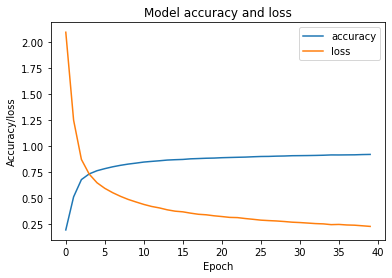

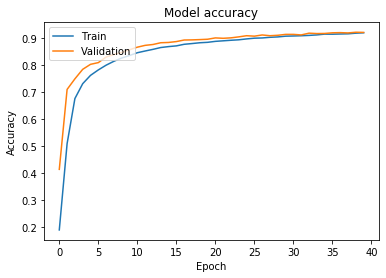

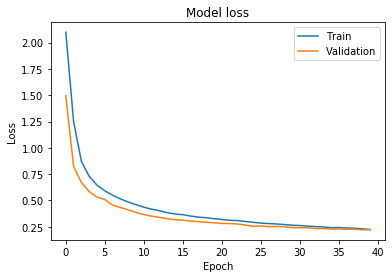

loss: 0.2671, accuracy: 90.79%


In [83]:
adv_model = tf.keras.models.load_model("models/adv_model")

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy and loss')
plt.ylabel('Accuracy/loss')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

(loss, accuracy) = adv_model.evaluate(test_X, test_Y, verbose=0)
print(f"loss: {loss:.4f}, accuracy: {accuracy * 100:.2f}%")

After those kinds of changes we now get a accuracy just around 91% on the testset.

# Test the model on own images

Let's see if this model can also classify some picures of my clothing.

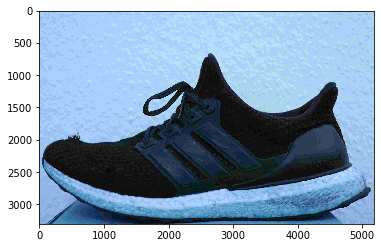

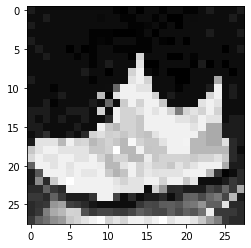

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Ankle boot


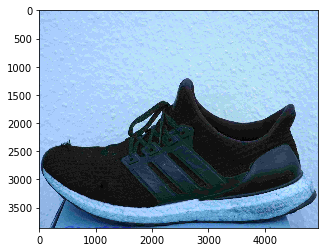

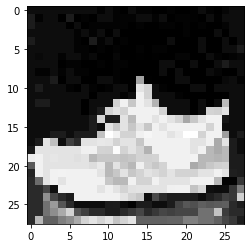

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Ankle boot


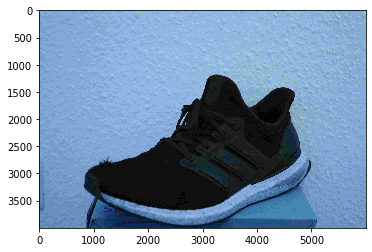

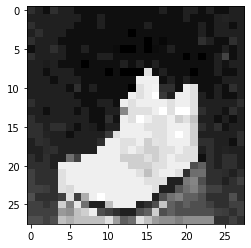

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Pullover


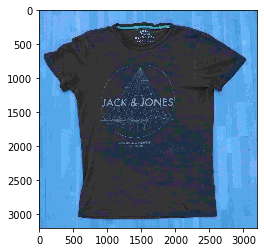

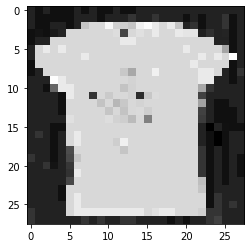

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Pullover


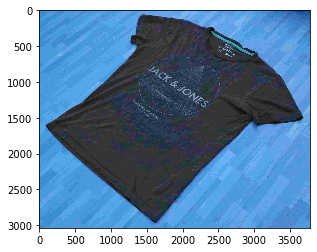

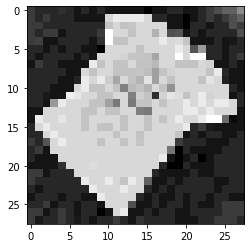

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Pullover


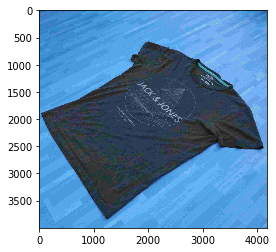

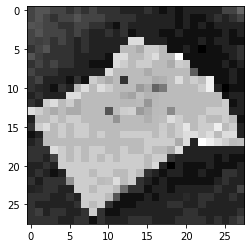

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Pullover


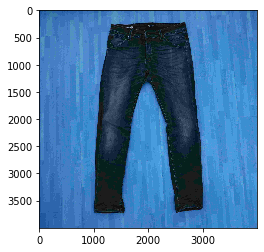

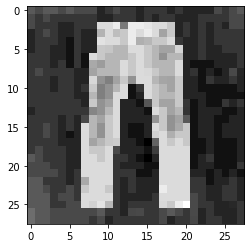

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Trouser


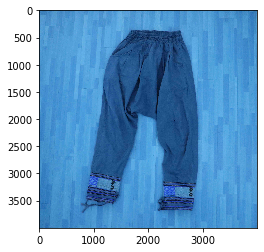

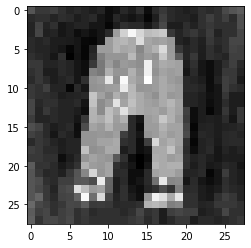

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Trouser


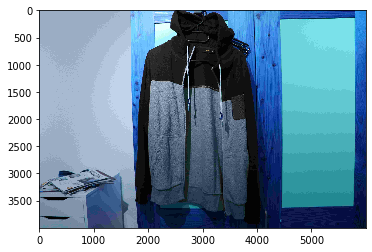

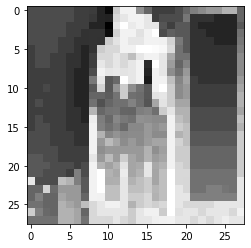

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Pullover


In [86]:
model = tf.keras.models.load_model("models/adv_model")

imgs = []
imgs.append(cv2.imread('data/shoe_1.JPG',1))
imgs.append(cv2.imread('data/shoe_2.JPG',1))
imgs.append(cv2.imread('data/shoe_3.JPG',1))
imgs.append(cv2.imread('data/tshirt_1.JPG',1))
imgs.append(cv2.imread('data/tshirt_2.JPG',1))
imgs.append(cv2.imread('data/tshirt_3.JPG',1))
imgs.append(cv2.imread('data/pants_1.JPG',1))
imgs.append(cv2.imread('data/pants_2.JPG',1))
imgs.append(cv2.imread('data/hoddie_1.JPG',1))

for img in imgs:
    plt.imshow(img)
    plt.show()

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    myPic = cv2.resize(gray, (28,28))
    myPic = cv2.bitwise_not(myPic)
    plt.imshow(cv2.resize(myPic, (28,28)), cmap="gray")
    plt.show()

    x = []
    x.append(myPic)
    
    result = model.predict(np.asarray(x).reshape((-1, 28, 28, 1)).astype(float))
    print(result)
    print(labels)
    max_index = result.argmax(axis=1)
    
    print(labels[max_index[0]])

With my own images i get also not very bad results. Even the pullover was classified correctly.

The miss classified pictures can be explained easily.
Because of the distorted images of the shoes, to match the inputdimensions the shoe looks more like an ankle boot.
Also i wanted to see how the model reacts to different angles for example with the t-shirt. There the model sees a bag.

# Conclusion

We can get pretty good results on the testdata with convolutions.
Obviously it is very important that your pictures you want to classify are very similar to your trainingdata.
And if you are a company that can set up a process for that kind of image analysis it can give you good results.